In [20]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sb


from pylab import rcParams
%matplotlib inline

rcParams['figure.figsize'] = 12,8
import matplotlib.pyplot as plt

In [2]:
data = pd.read_csv('CleanCreditScoring.csv')

In [3]:
data.head()

,Status,Seniority,Home,Time,Age,Marital,Records,Job,Expenses,Income,...,timeR,ageR,expensesR,incomeR,assetsR,debtR,amountR,priceR,finratR,savingsR
0,good,9,rent,60,30,married,no_rec,freelance,73,129,...,"time (48,99]","age (25,30]","exp (60,80]","inc (110,140]","asset (-1,0]","debt (-1,0]","am (600,900]","priz (0,1e+03]","finr (90,100]","sav (4,6]"
1,good,17,rent,60,58,widow,no_rec,fixed,48,131,...,"time (48,99]","age (50,99]","exp (40,50]","inc (110,140]","asset (-1,0]","debt (-1,0]","am (900,1.1e+03]","priz (1.5e+03,1.8e+03]","finr (50,70]","sav (4,6]"
2,bad,10,owner,36,46,married,yes_rec,freelance,90,200,...,"time (24,36]","age (40,50]","exp (80,1e+04]","inc (190,1e+04]","asset (0,3e+03]","debt (-1,0]","am (1.4e+03,1e+05]","priz (1.8e+03,1e+05]","finr (50,70]","sav (0,2]"
3,good,0,rent,60,24,single,no_rec,fixed,63,182,...,"time (48,99]","age (0,25]","exp (60,80]","inc (140,190]","asset (0,3e+03]","debt (-1,0]","am (600,900]","priz (1.3e+03,1.5e+03]","finr (50,70]","sav (6,99]"
4,good,0,rent,36,26,single,no_rec,fixed,46,107,...,"time (24,36]","age (25,30]","exp (40,50]","inc (80,110]","asset (-1,0]","debt (-1,0]","am (0,600]","priz (0,1e+03]","finr (0,50]","sav (6,99]"


In [5]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4446 entries, 0 to 4445
Data columns (total 27 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Status      4446 non-null   object 
 1   Seniority   4446 non-null   int64  
 2   Home        4446 non-null   object 
 3   Time        4446 non-null   int64  
 4   Age         4446 non-null   int64  
 5   Marital     4446 non-null   object 
 6   Records     4446 non-null   object 
 7   Job         4446 non-null   object 
 8   Expenses    4446 non-null   int64  
 9   Income      4446 non-null   int64  
 10  Assets      4446 non-null   int64  
 11  Debt        4446 non-null   int64  
 12  Amount      4446 non-null   int64  
 13  Price       4446 non-null   int64  
 14  Finrat      4446 non-null   float64
 15  Savings     4446 non-null   float64
 16  seniorityR  4446 non-null   object 
 17  timeR       4446 non-null   object 
 18  ageR        4446 non-null   object 
 19  expensesR   4446 non-null  

In [4]:
data.describe()

,Seniority,Time,Age,Expenses,Income,Assets,Debt,Amount,Price,Finrat,Savings
count,4446.000000,4446.000000,4446.000000,4446.000000,4446.000000,4446.000000,4446.000000,4446.000000,4446.000000,4446.000000,4446.000000
mean,7.991453,46.453441,37.084121,55.601439,140.629780,5354.948943,342.257085,1038.763383,1462.480432,72.616409,3.860083
std,8.176370,14.647979,10.986366,19.520839,80.177896,11534.328183,1244.694549,474.747952,628.555171,20.390595,3.726292
min,0.000000,6.000000,18.000000,35.000000,1.000000,0.000000,0.000000,100.000000,105.000000,6.702413,-8.160000
25%,2.000000,36.000000,28.000000,35.000000,90.000000,0.000000,0.000000,700.000000,1116.250000,60.030020,1.615385
50%,5.000000,48.000000,36.000000,51.000000,124.000000,3000.000000,0.000000,1000.000000,1400.000000,77.096757,3.120000
75%,12.000000,60.000000,45.000000,72.000000,170.000000,6000.000000,0.000000,1300.000000,1691.500000,88.460263,5.195688
max,48.000000,72.000000,68.000000,180.000000,959.000000,300000.000000,30000.000000,5000.000000,11140.000000,100.000000,33.250000


In [5]:
data.isnull().sum()

Status        0
Seniority     0
Home          0
Time          0
Age           0
Marital       0
Records       0
Job           0
Expenses      0
Income        0
Assets        0
Debt          0
Amount        0
Price         0
Finrat        0
Savings       0
seniorityR    0
timeR         0
ageR          0
expensesR     0
incomeR       0
assetsR       0
debtR         0
amountR       0
priceR        0
finratR       0
savingsR      0
dtype: int64

In [6]:
data.duplicated().sum()

2

In [7]:
data.drop_duplicates()

,Status,Seniority,Home,Time,Age,Marital,Records,Job,Expenses,Income,...,timeR,ageR,expensesR,incomeR,assetsR,debtR,amountR,priceR,finratR,savingsR
0,good,9,rent,60,30,married,no_rec,freelance,73,129,...,"time (48,99]","age (25,30]","exp (60,80]","inc (110,140]","asset (-1,0]","debt (-1,0]","am (600,900]","priz (0,1e+03]","finr (90,100]","sav (4,6]"
1,good,17,rent,60,58,widow,no_rec,fixed,48,131,...,"time (48,99]","age (50,99]","exp (40,50]","inc (110,140]","asset (-1,0]","debt (-1,0]","am (900,1.1e+03]","priz (1.5e+03,1.8e+03]","finr (50,70]","sav (4,6]"
2,bad,10,owner,36,46,married,yes_rec,freelance,90,200,...,"time (24,36]","age (40,50]","exp (80,1e+04]","inc (190,1e+04]","asset (0,3e+03]","debt (-1,0]","am (1.4e+03,1e+05]","priz (1.8e+03,1e+05]","finr (50,70]","sav (0,2]"
3,good,0,rent,60,24,single,no_rec,fixed,63,182,...,"time (48,99]","age (0,25]","exp (60,80]","inc (140,190]","asset (0,3e+03]","debt (-1,0]","am (600,900]","priz (1.3e+03,1.5e+03]","finr (50,70]","sav (6,99]"
4,good,0,rent,36,26,single,no_rec,fixed,46,107,...,"time (24,36]","age (25,30]","exp (40,50]","inc (80,110]","asset (-1,0]","debt (-1,0]","am (0,600]","priz (0,1e+03]","finr (0,50]","sav (6,99]"
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4441,bad,1,rent,60,39,married,no_rec,fixed,69,92,...,"time (48,99]","age (30,40]","exp (60,80]","inc (80,110]","asset (-1,0]","debt (-1,0]","am (600,900]","priz (1e+03,1.3e+03]","finr (80,90]","sav (0,2]"
4442,good,22,owner,60,46,married,no_rec,fixed,60,75,...,"time (48,99]","age (40,50]","exp (50,60]","inc (0,80]","asset (0,3e+03]","debt (500,1.5e+03]","am (900,1.1e+03]","priz (1e+03,1.3e+03]","finr (70,80]","sav (0,2]"
4443,bad,0,owner,24,37,married,no_rec,partime,60,90,...,"time (12,24]","age (30,40]","exp (50,60]","inc (80,110]","asset (3e+03,5e+03]","debt (-1,0]","am (0,600]","priz (0,1e+03]","finr (50,70]","sav (0,2]"
4444,good,0,rent,48,23,single,no_rec,freelance,49,140,...,"time (36,48]","age (0,25]","exp (40,50]","inc (110,140]","asset (-1,0]","debt (-1,0]","am (0,600]","priz (0,1e+03]","finr (90,100]","sav (6,99]"


In [32]:
data.drop(['timeR','ageR','expensesR','incomeR','assetsR','debtR','amountR','priceR','finratR', 'savingsR'], axis = 1, inplace = True)

In [33]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4446 entries, 0 to 4445
Data columns (total 17 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Status      4446 non-null   object 
 1   Seniority   4446 non-null   int64  
 2   Home        4446 non-null   object 
 3   Time        4446 non-null   int64  
 4   Age         4446 non-null   int64  
 5   Marital     4446 non-null   object 
 6   Records     4446 non-null   object 
 7   Job         4446 non-null   object 
 8   Expenses    4446 non-null   int64  
 9   Income      4446 non-null   int64  
 10  Assets      4446 non-null   int64  
 11  Debt        4446 non-null   int64  
 12  Amount      4446 non-null   int64  
 13  Price       4446 non-null   int64  
 14  Finrat      4446 non-null   float64
 15  Savings     4446 non-null   float64
 16  seniorityR  4446 non-null   object 
dtypes: float64(2), int64(9), object(6)
memory usage: 590.6+ KB


In [35]:
data.drop('seniorityR', axis = 1, inplace = True)

In [43]:
data.head()

,Status,Seniority,Home,Time,Age,Marital,Records,Job,Expenses,Income,Assets,Debt,Amount,Price,Finrat,Savings
0,good,9,rent,60,30,married,no_rec,freelance,73,129,0,0,800,846,94.562648,4.200000
1,good,17,rent,60,58,widow,no_rec,fixed,48,131,0,0,1000,1658,60.313631,4.980000
2,bad,10,owner,36,46,married,yes_rec,freelance,90,200,3000,0,2000,2985,67.001675,1.980000
3,good,0,rent,60,24,single,no_rec,fixed,63,182,2500,0,900,1325,67.924528,7.933333
4,good,0,rent,36,26,single,no_rec,fixed,46,107,0,0,310,910,34.065934,7.083871


In [48]:
data['Job'].value_counts()

fixed        2803
freelance    1021
partime       451
others        171
Name: Job, dtype: int64

In [49]:
data['Home'].value_counts()

owner      2106
rent        973
parents     782
other       319
priv        246
ignore       20
Name: Home, dtype: int64

In [50]:
data['Marital'].value_counts()

married      3238
single        973
separated     130
widow          67
divorced       38
Name: Marital, dtype: int64

In [51]:
data['Records'].value_counts()

no_rec     3677
yes_rec     769
Name: Records, dtype: int64

array([[<AxesSubplot:title={'center':'Income'}>]], dtype=object)

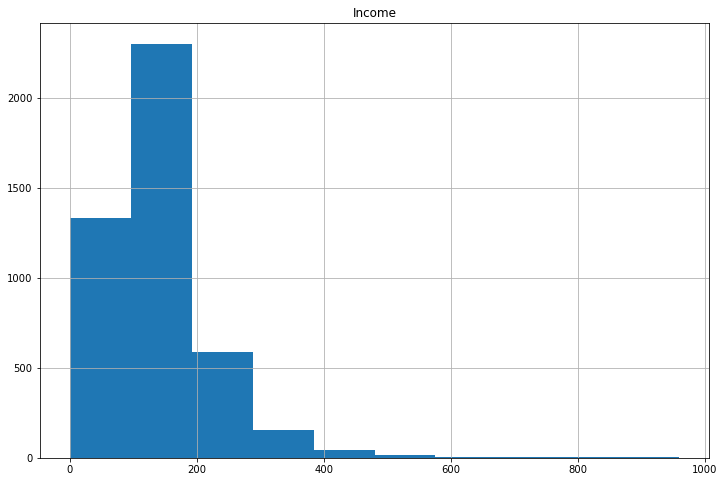

In [21]:
data.hist(column = 'Income')

<AxesSubplot:xlabel='Income', ylabel='Density'>

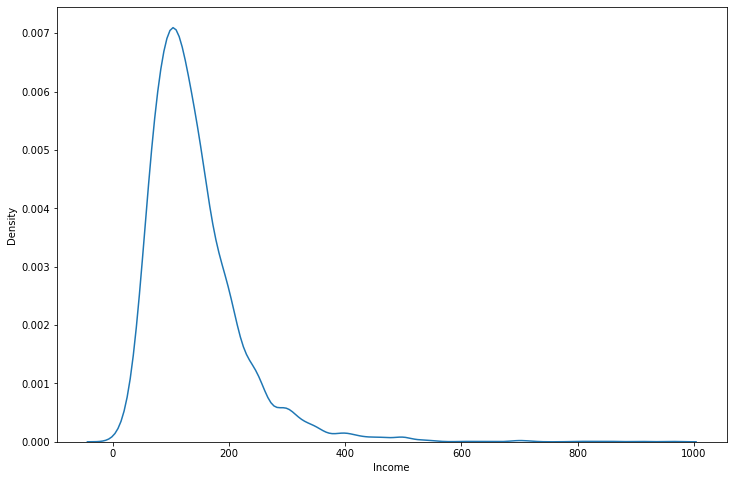

In [22]:
sb.kdeplot(data['Income'])

<AxesSubplot:>

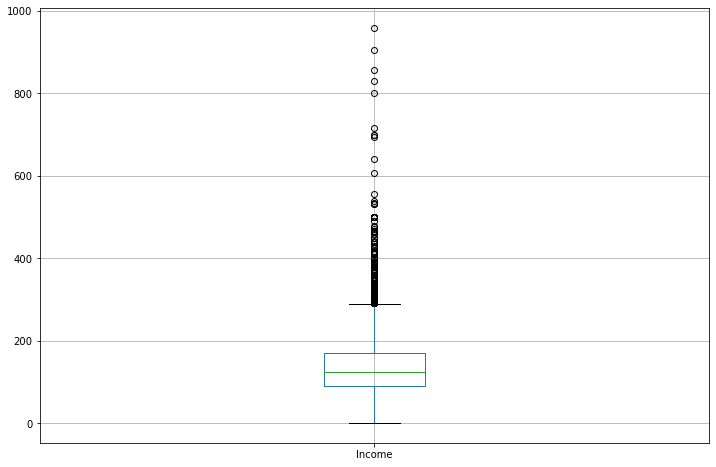

In [23]:
data.boxplot(column=['Income'])

array([[<AxesSubplot:title={'center':'Expenses'}>]], dtype=object)

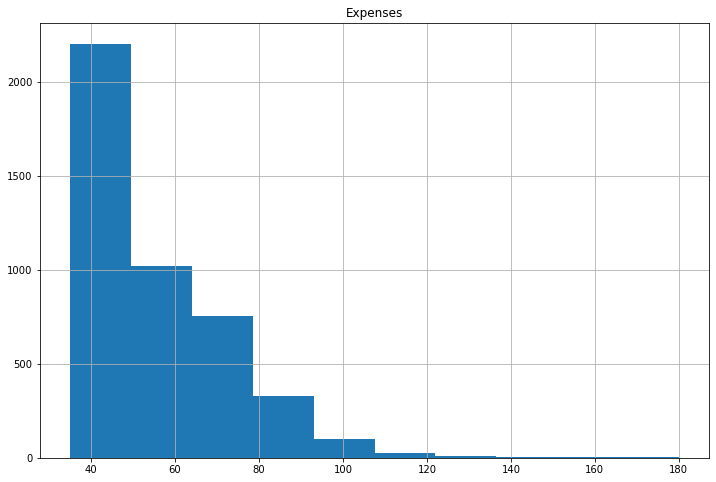

In [24]:
data.hist(column = 'Expenses')

<AxesSubplot:xlabel='Expenses', ylabel='Density'>

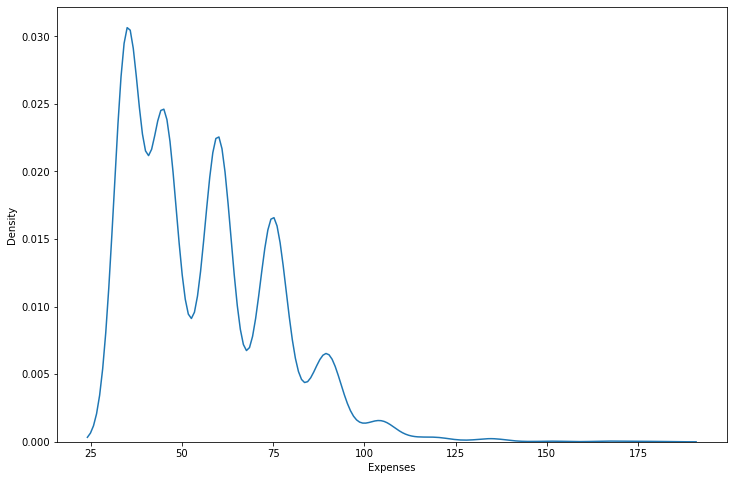

In [25]:
sb.kdeplot(data['Expenses'])

<AxesSubplot:>

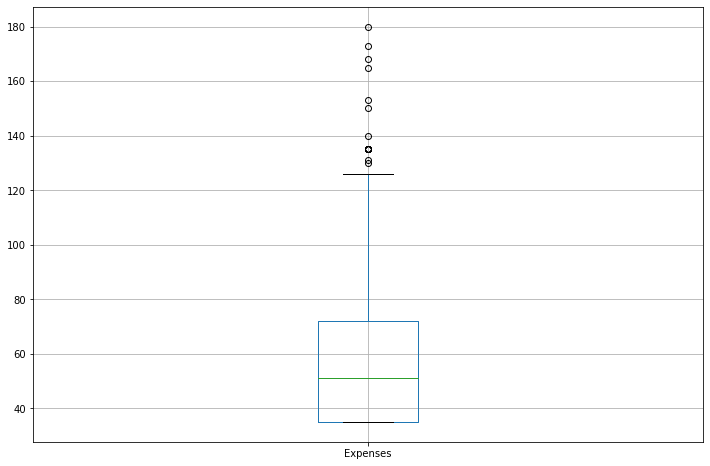

In [26]:
data.boxplot(column=['Expenses'])

In [14]:
data['Status'].value_counts()

good    3197
bad     1249
Name: Status, dtype: int64

<AxesSubplot:xlabel='Status', ylabel='count'>

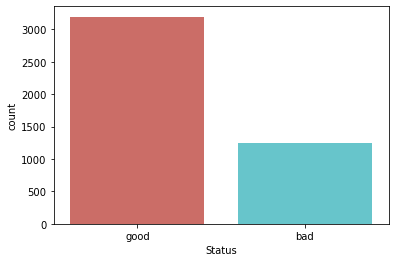

In [15]:
sb.countplot(x='Status', data=data, palette = 'hls')

Bivariate Analysis

In [16]:
data.corr()

,Seniority,Time,Age,Expenses,Income,Assets,Debt,Amount,Price,Finrat,Savings
Seniority,1.000000,-0.021874,0.506089,0.125680,0.121224,0.124241,-0.019347,-0.007639,0.041122,-0.073392,0.093246
Time,-0.021874,1.000000,-0.051850,-0.001717,-0.029915,-0.083018,0.058267,0.430858,0.129677,0.468641,0.101653
Age,0.506089,-0.051850,1.000000,0.248137,0.147556,0.180986,-0.046188,0.029031,0.048685,-0.034514,0.062036
Expenses,0.125680,-0.001717,0.248137,1.000000,0.255005,0.018935,0.014771,0.049539,0.040728,0.024582,-0.038094
Income,0.121224,-0.029915,0.147556,0.255005,1.000000,0.219112,0.144697,0.190820,0.217789,-0.003407,0.717963
Assets,0.124241,-0.083018,0.180986,0.018935,0.219112,1.000000,0.191619,0.144284,0.194894,-0.025060,0.067001
Debt,-0.019347,0.058267,-0.046188,0.014771,0.144697,0.191619,1.000000,0.050902,0.043917,0.008609,0.004990
Amount,-0.007639,0.430858,0.029031,0.049539,0.190820,0.144284,0.050902,1.000000,0.725025,0.473842,-0.149323
Price,0.041122,0.129677,0.048685,0.040728,0.217789,0.194894,0.043917,0.725025,1.000000,-0.181348,-0.070361
Finrat,-0.073392,0.468641,-0.034514,0.024582,-0.003407,-0.025060,0.008609,0.473842,-0.181348,1.000000,-0.123180


<AxesSubplot:>

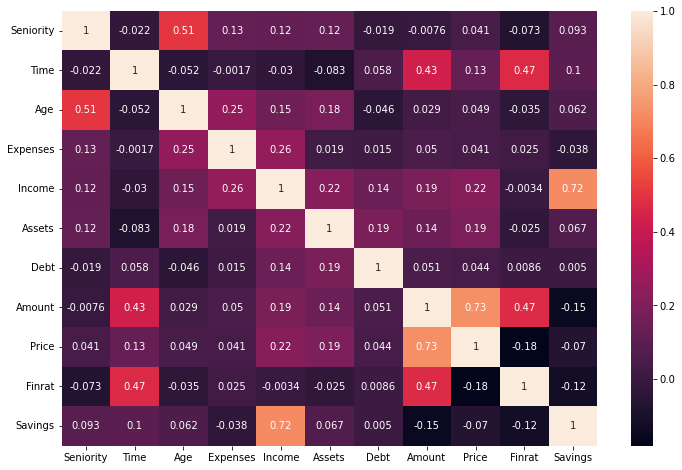

In [47]:
sb.heatmap(data.corr(), annot = True)

<AxesSubplot:>

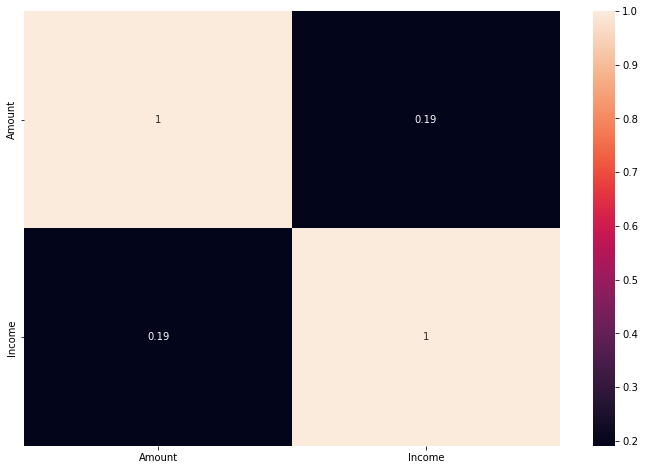

In [30]:
sb.heatmap(data[['Amount', 'Income']].corr(), annot=True)

The variables, Amount and Income have very weak correlation

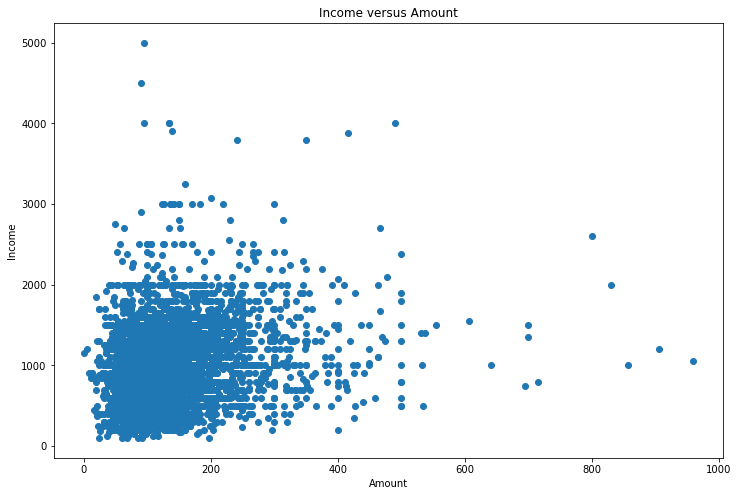

In [27]:
plt.scatter(data.Income, data.Amount)
plt.title('Income versus Amount')
plt.xlabel('Amount')
plt.ylabel('Income')
plt.show()

In [36]:
from sklearn.linear_model import LinearRegression 

In [37]:
y = data['Income'] #response variable(target/dependent)
x = data[['Amount']]

In [38]:
model = LinearRegression().fit(x,y)

In [41]:
model.coef_

array([0.03222669])

In [42]:
model.intercept_

107.15387368814339

y = 0.032x + 107.154  #y =Income x = Amount

MULITIVARIATE ANALYSIS

In [45]:
from sklearn.preprocessing import LabelEncoder

In [46]:
encoder = LabelEncoder()

In [52]:
cols = ['Job', 'Home', 'Marital', 'Records']
data[cols] = data[cols].apply(encoder.fit_transform)

In [53]:
data.head()

,Status,Seniority,Home,Time,Age,Marital,Records,Job,Expenses,Income,Assets,Debt,Amount,Price,Finrat,Savings
0,good,9,5,60,30,1,0,1,73,129,0,0,800,846,94.562648,4.200000
1,good,17,5,60,58,4,0,0,48,131,0,0,1000,1658,60.313631,4.980000
2,bad,10,2,36,46,1,1,1,90,200,3000,0,2000,2985,67.001675,1.980000
3,good,0,5,60,24,3,0,0,63,182,2500,0,900,1325,67.924528,7.933333
4,good,0,5,36,26,3,0,0,46,107,0,0,310,910,34.065934,7.083871


In [55]:
X = data.loc[:, ['Home','Job','Expenses','Income','Assets','Debt','Savings']].values 
Y = data.loc[:, 'Status'].values

In [56]:
X

array([[5.00000000e+00, 1.00000000e+00, 7.30000000e+01, ...,
        0.00000000e+00, 0.00000000e+00, 4.20000000e+00],
       [5.00000000e+00, 0.00000000e+00, 4.80000000e+01, ...,
        0.00000000e+00, 0.00000000e+00, 4.98000000e+00],
       [2.00000000e+00, 1.00000000e+00, 9.00000000e+01, ...,
        3.00000000e+03, 0.00000000e+00, 1.98000000e+00],
       ...,
       [2.00000000e+00, 3.00000000e+00, 6.00000000e+01, ...,
        3.50000000e+03, 0.00000000e+00, 1.44000000e+00],
       [5.00000000e+00, 1.00000000e+00, 4.90000000e+01, ...,
        0.00000000e+00, 0.00000000e+00, 7.94181818e+00],
       [2.00000000e+00, 1.00000000e+00, 6.00000000e+01, ...,
        4.00000000e+03, 1.00000000e+03, 3.11111111e+00]])

In [57]:
Y

array(['good', 'good', 'bad', ..., 'bad', 'good', 'good'], dtype=object)

In [58]:
from sklearn.preprocessing import StandardScaler

In [59]:
sc = StandardScaler()

x_scaled = sc.fit_transform(X)

In [60]:
x_scaled

array([[ 1.63329697,  0.40496139,  0.89138163, ..., -0.4643141 ,
        -0.27500368,  0.09123144],
       [ 1.63329697, -0.63576598, -0.38944507, ..., -0.4643141 ,
        -0.27500368,  0.30057838],
       [-0.65888685,  0.40496139,  1.76234379, ..., -0.20419168,
        -0.27500368, -0.50460215],
       ...,
       [-0.65888685,  2.48641614,  0.22535175, ..., -0.16083794,
        -0.27500368, -0.64953465],
       [ 1.63329697,  0.40496139, -0.338212  , ..., -0.4643141 ,
        -0.27500368,  1.09551117],
       [-0.65888685,  0.40496139,  0.22535175, ..., -0.1174842 ,
         0.52849665, -0.20101927]])

In [62]:
from sklearn.decomposition import PCA
pca = PCA(n_components = 4)

p = pca.fit_transform(x_scaled)

p

array([[-0.31607867, -1.59191186,  0.79536745, -0.62303417],
       [-0.21299861, -1.30502442, -0.33076967,  0.13730321],
       [ 0.38964848, -0.49249519,  1.04252412, -0.1239624 ],
       ...,
       [-1.23530006,  0.80197848,  0.54989226, -1.92065879],
       [ 0.16870449, -1.22773784, -0.38015379, -0.97594841],
       [-0.01732244,  0.56549673,  0.32377734, -0.01877464]])

In [63]:
principalDF = pd.DataFrame(data=p, columns= ['PC1', 'PC2','PC3', 'PC4'])
finalDf = pd.concat([principalDF, data[['Status']]], axis = 1)
finalDf.head()

,PC1,PC2,PC3,PC4,Status
0,-0.316079,-1.591912,0.795367,-0.623034,good
1,-0.212999,-1.305024,-0.330770,0.137303,good
2,0.389648,-0.492495,1.042524,-0.123962,bad
3,0.883873,-1.708323,-0.058040,-0.062332,good
4,-0.093267,-1.299465,-0.610253,0.052204,good
